# Life Expectancy and GDP Starter

For this project, we will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

In [414]:
# import libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [415]:
# Load the data
data = pd.read_csv('all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [417]:
# Amount of data in the database
print(len(data))

96


The database consist of 96 rows of data.

In [420]:
# List of unique Countires in the database
countries = data.Country.unique()
print("Countires:",countries)

Countires: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


There are six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [424]:
# List of unique Years in the database
years = data.Year.unique()
print("Years:",years)

Years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The above data shows which years are represented in the data, and they are 2000-2015.

#### Data Cleanup
Let us shorten the column name for Life expectancy at birth (years)

In [427]:
# Use rename function to change the name 'Life expectancy at birth (years)' to 'LE'
data = data.rename({"Life expectancy at birth (years)":"LE"}, axis = "columns")
data.head()

,Country,Year,LE,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Let us find the average Life Expectancy and GDP for each Country.

In [431]:
# Drop the column 'Year' since we dont need average of years
# Compute average of LE and GDP after grouping the Data by Country
mean_data = data.drop('Year',axis=1).groupby('Country').mean().reset_index()
mean_data.head(10)

,Country,LE,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


#### Life Expectancy Study
Average Life Expectancy for each Country:

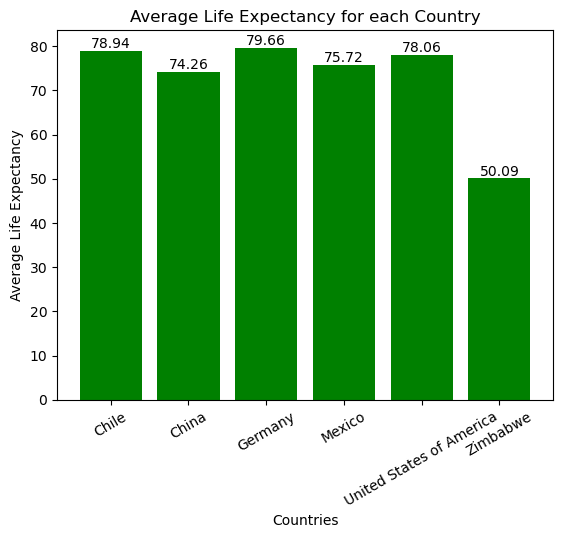

In [434]:
# The ax variable is used to plot data and set properties like the title
ax = plt.subplot()
# The bars variable holds the bar container object
bars = plt.bar(mean_data.Country,mean_data.LE,color='g')
# Below code will display a bar plot with text labels showing the life expectancy values on top of each bar, rounded to two decimal places
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
# Add label to x-axis and y-axis
plt.xlabel('Countries')
plt.ylabel('Average Life Expectancy')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=30)
# Add title to the bar plot
plt.title('Average Life Expectancy for each Country')
plt.show()

The above graph tells us that Zimbabwe has less average life expectancy (50 years) compared to the other countries (74-80 years).

Average Life Expectancy for each Country over the years:

In [438]:
# Seperate data based on the Country
# Compute average LE and GDP after grouping the data by Country and Year
data_Chile = data[data.Country=='Chile'].groupby(['Country','Year']).mean().reset_index()
data_China = data[data.Country=='China'].groupby(['Country','Year']).mean().reset_index()
data_Germany = data[data.Country=='Germany'].groupby(['Country','Year']).mean().reset_index()
data_Mexico = data[data.Country=='Mexico'].groupby(['Country','Year']).mean().reset_index()
data_USA = data[data.Country=='United States of America'].groupby(['Country','Year']).mean().reset_index()
data_Zimbabwe = data[data.Country=='Zimbabwe'].groupby(['Country','Year']).mean().reset_index()

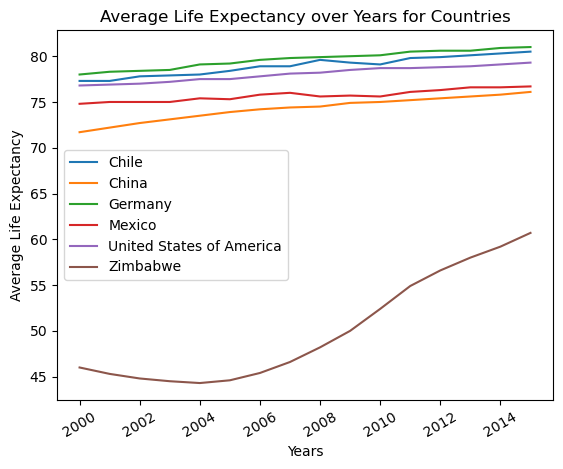

In [440]:
# Create line plots for all the Countires in the same graph for better comparison
plt.plot(data_Chile.Year,data_Chile.LE)
plt.plot(data_China.Year,data_China.LE)
plt.plot(data_Germany.Year,data_Germany.LE)
plt.plot(data_Mexico.Year,data_Mexico.LE)
plt.plot(data_USA.Year,data_USA.LE)
plt.plot(data_Zimbabwe.Year,data_Zimbabwe.LE)
plt.xlabel('Years')
plt.xticks(rotation=30)
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy over Years for Countries')
# Add legends for each Coutry for better understanding
plt.legend(countries)
plt.show()

The above graph tells us that although Zimbabwe has less average life expectancy as compared to the other countries, this has improved a lot over the years from 45 years to 60 years. On further analysis as below, we will see that this has a correlation with the country's GDP.

#### GDP Study
Average GDP for each Country:

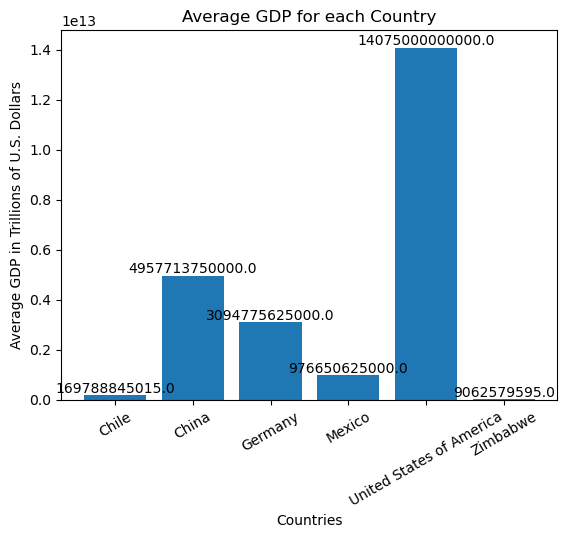

In [444]:
# The ax variable is used to plot data and set properties like the title
ax = plt.subplot()
# The bars variable holds the bar container object
bars = plt.bar(mean_data.Country,mean_data.GDP)
# Below code will display a bar plot with text labels showing the life expectancy values on top of each bar, rounded to two decimal places
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 0), ha='center', va='bottom')
# Add label to x-axis and y-axis
plt.xlabel('Countries')
plt.ylabel('Average GDP in Trillions of U.S. Dollars')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=30)
# Add title to the bar plot
plt.title('Average GDP for each Country')
plt.show()

The above graph tells us that Chile and Zimbabwe has least GDP compared to the other countries. United States of America has the highest GDP among all the Countries in the database.

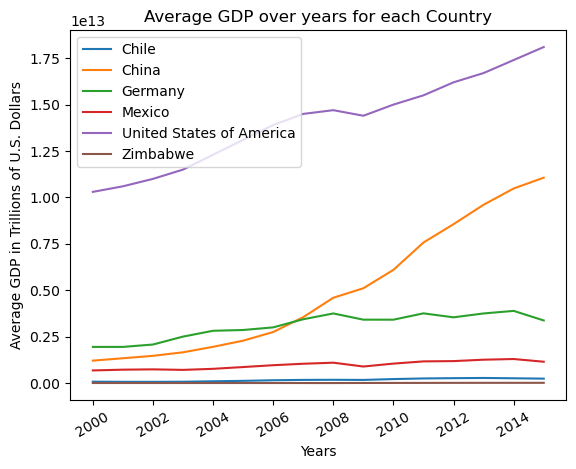

In [447]:
# Create line plots for all the Countires in the same graph for better comparison
plt.plot(data_Chile.Year,data_Chile.GDP)
plt.plot(data_China.Year,data_China.GDP)
plt.plot(data_Germany.Year,data_Germany.GDP)
plt.plot(data_Mexico.Year,data_Mexico.GDP)
plt.plot(data_USA.Year,data_USA.GDP)
plt.plot(data_Zimbabwe.Year,data_Zimbabwe.GDP)
plt.xlabel('Years')
plt.xticks(rotation=30)
plt.ylabel('Average GDP in Trillions of U.S. Dollars')
plt.title('Average GDP over years for each Country')
# Add legends for each Coutry for better understanding
plt.legend(countries)
plt.show()

In the above graph, the countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

#### Life Expectancy vs GDP for each Country


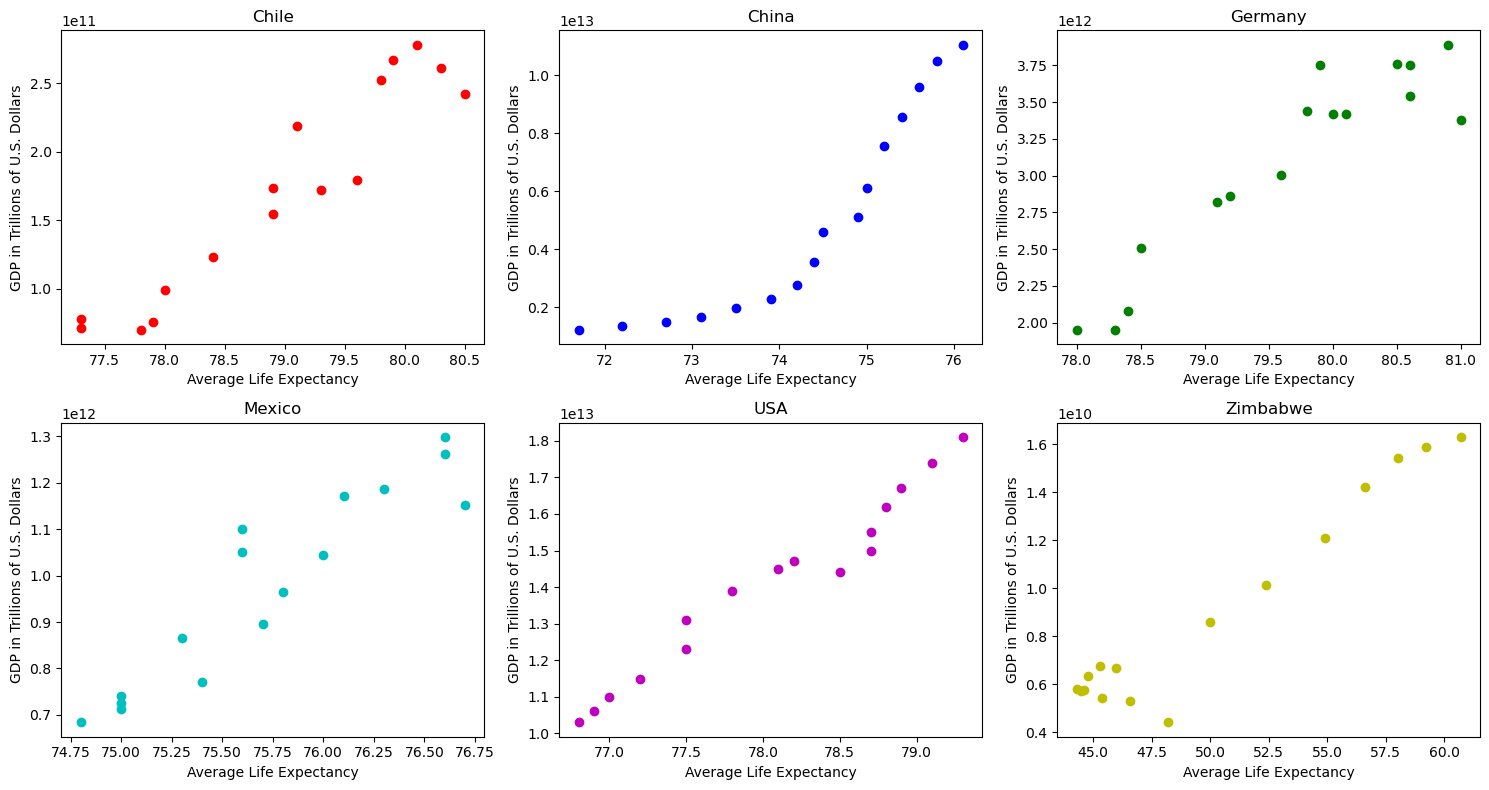

In [451]:
# Create a new figure in Matplotlib with a specified size
plt.figure(figsize=(15,8))
# Create a grid with 2 rows and 3 columns
# Create scatter plots for the 6 Countries in the 6 grids
plt.subplot(2,3,1)
plt.scatter(data_Chile['LE'], data_Chile['GDP'],color='r')
plt.xlabel('Average Life Expectancy')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.title('Chile')
plt.subplot(2,3,2)
plt.scatter(data_China['LE'], data_China['GDP'],color='b')
plt.xlabel('Average Life Expectancy')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.title('China')
plt.subplot(2,3,3)
plt.scatter(data_Germany['LE'], data_Germany['GDP'],color='g')
plt.xlabel('Average Life Expectancy')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.title('Germany')
plt.subplot(2,3,4)
plt.scatter(data_Mexico['LE'], data_Mexico['GDP'],color='c')
plt.xlabel('Average Life Expectancy')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.title('Mexico')
plt.subplot(2,3,5)
plt.scatter(data_USA['LE'], data_USA['GDP'],color='m')
plt.xlabel('Average Life Expectancy')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.title('USA')
plt.subplot(2,3,6)
plt.scatter(data_Zimbabwe['LE'], data_Zimbabwe['GDP'],color='y')
plt.xlabel('Average Life Expectancy')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.title('Zimbabwe')
# Below code ensures that the subplots are spaced appropriately, without overlaps making the plot more readable and visually appealing
plt.tight_layout()
plt.show()

Here, countries are broken out into each scatter plot by facets. Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.

### Conclusions

The project was able to answer the below questions:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - The life expectancy had a left skew, or most of the observations were on the right side.